# 1. Install Dependencies and Setup

In [10]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.16.2-cp311-cp311-macosx_10_15_x86_64.whl.metadata (4.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 33.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 38.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 33.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install tensorflow opencv-python matplotlib

In [3]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
appnope                      0.1.4
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.7.4
charset-normalizer           3.3.2
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.5
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.65.4
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.5
ipython                      8.26.0
jedi                         0.19.1
jupyter_client               8.6.2
jupyter_core                 5.7.2
keras                        3.4.1
kiwisolver                   1.4.5
li

In [3]:
import tensorflow as tf
import os

2024-09-29 21:52:10.707995: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
len(gpus)

0

In [6]:
"""
The following code snippet is able to avoid OOM because we
iterate through the gpus on the list and set it as a 

Before we start to elaborate the code we need to understande the GPU memory allocation first.
By default, Tensorflow tries to allocate all available GPU memory upfront when a session
is created. This can lead to out-of-memory (OOM) errors if the allocated memory exceeds 
what's needed or if multiple applications are trying to use the GPU simultaneously.

The function tf.config.experimental.list_physical_devices('GPU') 
returns a list of available GPU devices.

The code 'tf.config.experimental.set_memory_growth(gpu, True)' in the for loop
changes the default behavior.
This means TensorFlow starts with a small memory allocation and increases it as needed 
by the workload during the runtime.

After we set them all to true, the useage of which go first will be determined by the 
Tensorflow's GPU selection policy.

"""

"\nThe following code snippet is able to avoid OOM because we\niterate through the gpus on the list and set it as a \n\nBefore we start to elaborate the code we need to understande the GPU memory allocation first.\nBy default, Tensorflow tries to allocate all available GPU memory upfront when a session\nis created. This can lead to out-of-memory (OOM) errors if the allocated memory exceeds \nwhat's needed or if multiple applications are trying to use the GPU simultaneously.\n\nThe function tf.config.experimental.list_physical_devices('GPU') \nreturns a list of available GPU devices.\n\nThe code 'tf.config.experimental.set_memory_growth(gpu, True)' in the for loop\nchanges the default behavior.\nThis means TensorFlow starts with a small memory allocation and increases it as needed \nby the workload during the runtime.\n\nAfter we set them all to true, the useage of which go first will be determined by the \nTensorflow's GPU selection policy.\n\n"

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [10]:
import cv2
import imghdr
from matplotlib import pyplot as plt

/var/folders/6_/ksbfy_td7815skjpfw7m6s2h0000gn/T/ipykernel_58821/3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [11]:
data_dir = 'data'  

In [12]:
# set data_dir as the string and pass it into listdir as parameter
for image in os.listdir(data_dir):
    print(image)

happy
sad


In [13]:
#
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
"""
The purpose of function os.listdir()
The function os.listdir() is used to list 
all the elements(files and directories) in a specified directory.
It iterate through the path and return the list of strings, where each string
is the name of a file or directory.
"""

"""
The purpose of function os.path.join():
It is similar to the concatenate of the strings. So we concatenate those strings 
to become the path. Next use this path to fetch the images and do the try except

"""

'\nThe purpose of function os.path.join():\nIt is similar to the concatenate of the strings. So we concatenate those strings \nto become the path. Next use this path to fetch the images and do the try except\n\n'

In [15]:
#Looping through every folders in data_dir (happy and sad folder)
for image_class in os.listdir(data_dir): 
    # Looping through every images in happy and sad
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            #read an image from a file into a NumPy array
            img = cv2.imread(image_path)
            #judge the type of the image
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                #type out the image type is not allowed
                #format here is used for string formatting
                #{} is placeholder, and inside the .format() is the string that want to pass in
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/happy/.ipynb_checkpoints
Issue with image data/sad/.ipynb_checkpoints


# 3. Load Data

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#return a tf.data.Dataset object

data = tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 307 files belonging to 2 classes.


In [19]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
for image in enumerate(data):
    print(image)

(0, (<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[2.38429688e+02, 2.38429688e+02, 2.38429688e+02],
         [2.38429688e+02, 2.38429688e+02, 2.38429688e+02],
         [2.38429688e+02, 2.38429688e+02, 2.38429688e+02],
         ...,
         [2.38000000e+02, 2.38000000e+02, 2.38000000e+02],
         [2.38000000e+02, 2.38000000e+02, 2.38000000e+02],
         [2.38000000e+02, 2.38000000e+02, 2.38000000e+02]],

        [[2.38710938e+02, 2.38710938e+02, 2.38710938e+02],
         [2.38710938e+02, 2.38710938e+02, 2.38710938e+02],
         [2.38710938e+02, 2.38710938e+02, 2.38710938e+02],
         ...,
         [2.38000000e+02, 2.38000000e+02, 2.38000000e+02],
         [2.38000000e+02, 2.38000000e+02, 2.38000000e+02],
         [2.38000000e+02, 2.38000000e+02, 2.38000000e+02]],

        [[2.38148438e+02, 2.38148438e+02, 2.38148438e+02],
         [2.38148438e+02, 2.38148438e+02, 2.38148438e+02],
         [2.38148438e+02, 2.38148438e+02, 2.38148438e+02],
         ...,
     

2024-09-29 21:52:23.061019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
#for the Dataset object is like a generator it doesn't load the data to memory immediately
"""
This line converting a data object, a TensorFlow dataset, into a special kind of object (an iterator) 
that can give you pieces (or "batches") of the data one at a time. 
Each of these pieces is presented in the form of NumPy arrays.
"""
data_iterator = data.as_numpy_iterator()

In [22]:
#The next function will return the next batch
#The batch size is set when we create the tf.data.Dataset object
#When we transfor the Dataset object into iterator it will inherit those settings 
batch = data_iterator.next()

In [23]:
#Images that represented as numpy array
print(batch[0])
#Represent the label
#label 1: sad people 
#label 2: happy people
print(batch[1])

[[[[177.         177.         177.        ]
   [177.         177.         177.        ]
   [177.         177.         177.        ]
   ...
   [177.         177.         177.        ]
   [177.         177.         177.        ]
   [177.         177.         177.        ]]

  [[177.         177.         177.        ]
   [177.         177.         177.        ]
   [177.         177.         177.        ]
   ...
   [176.91406    176.91406    176.91406   ]
   [176.91406    176.91406    176.91406   ]
   [176.91406    176.91406    176.91406   ]]

  [[177.         177.         177.        ]
   [177.         177.         177.        ]
   [177.         177.         177.        ]
   ...
   [176.52344    176.52344    176.52344   ]
   [176.52344    176.52344    176.52344   ]
   [176.52344    176.52344    176.52344   ]]

  ...

  [[146.09375    146.09375    146.09375   ]
   [145.96283    145.96283    145.96283   ]
   [145.36774    145.36774    145.36774   ]
   ...
   [132.53851    132.53851    132.5

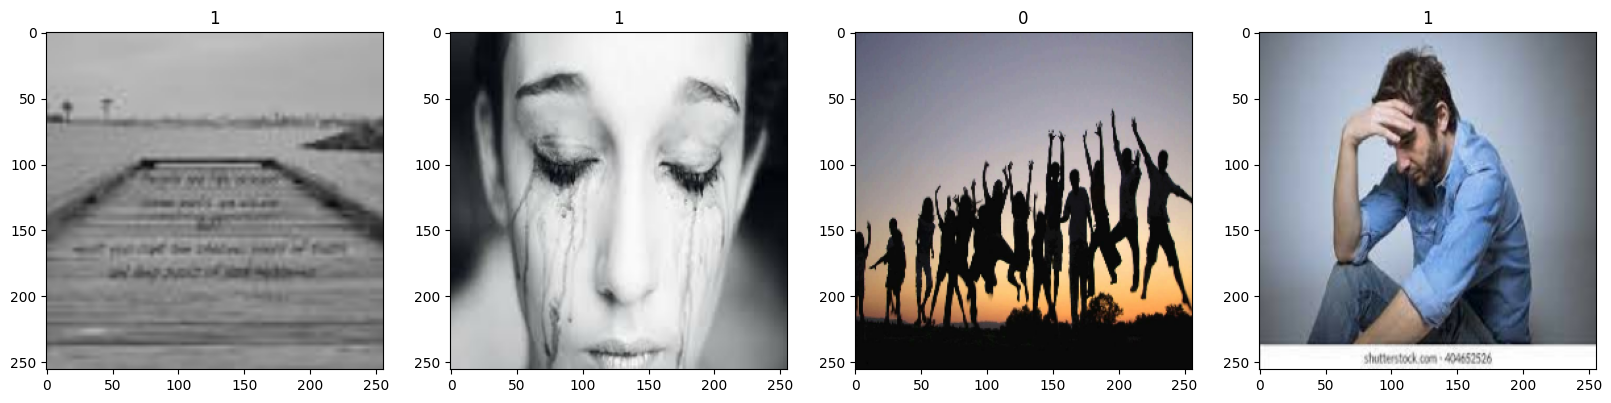

In [24]:
#For subplots function it creates the figure(similar to container or backdrop)
#ax here is an array of Axis object
#Each Axes object represents an individual subplot within the figure. 
#The Axes object is where you can actually draw your data (e
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
#Enumerate here will return the a pair for each item
for idx, img in enumerate(batch[0][:4]):
    #imshow is a function to display an image
    #img.astype converts image data to integer type
    """Commonly, image pixel values are in the range of 0 to 255 for uint8 data type, 
    which is an 8-bit unsigned integer format. However, when working with deep learning frameworks like TensorFlow, 
    images are often represented as floating-point numbers (e.g., float32) where pixel values might be normalized 
    (e.g., in the range [0, 1]).
    """
    #imshow is designed to work with integer pixel values
    #Most image formats(JPEG, PNG) store pixel value in unit-8 data type
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [26]:
#What the following is doing is the same as
scaled = batch[0]/255
scaled
# However, we have to let them do in the data pipeline in the future so we have to do the following steps

array([[[[0.69411767, 0.69411767, 0.69411767],
         [0.69411767, 0.69411767, 0.69411767],
         [0.69411767, 0.69411767, 0.69411767],
         ...,
         [0.69411767, 0.69411767, 0.69411767],
         [0.69411767, 0.69411767, 0.69411767],
         [0.69411767, 0.69411767, 0.69411767]],

        [[0.69411767, 0.69411767, 0.69411767],
         [0.69411767, 0.69411767, 0.69411767],
         [0.69411767, 0.69411767, 0.69411767],
         ...,
         [0.69378066, 0.69378066, 0.69378066],
         [0.69378066, 0.69378066, 0.69378066],
         [0.69378066, 0.69378066, 0.69378066]],

        [[0.69411767, 0.69411767, 0.69411767],
         [0.69411767, 0.69411767, 0.69411767],
         [0.69411767, 0.69411767, 0.69411767],
         ...,
         [0.69224876, 0.69224876, 0.69224876],
         [0.69224876, 0.69224876, 0.69224876],
         [0.69224876, 0.69224876, 0.69224876]],

        ...,

        [[0.5729167 , 0.5729167 , 0.5729167 ],
         [0.57240325, 0.57240325, 0.57240325]

In [27]:
#Each element in DataSet object here is containing tuples with two components
#lambda function is a small, anonymous function
#lambda arguements : expression
#We will want to set the RGB to between 0 to 1 it will make the running faster
#data.map will allows us to do the transformation in pipeline
#reference: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map
data = data.map(lambda x,y: (x/255, y))
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
data.as_numpy_iterator().next()

(array([[[[1.77090988e-01, 1.77090988e-01, 1.77090988e-01],
          [1.77650124e-01, 1.77650124e-01, 1.77650124e-01],
          [1.41996011e-01, 1.41996011e-01, 1.41996011e-01],
          ...,
          [2.17524514e-01, 2.17524514e-01, 2.17524514e-01],
          [2.27351412e-01, 2.27351412e-01, 2.27351412e-01],
          [1.94860607e-01, 1.94860607e-01, 1.94860607e-01]],
 
         [[1.73529416e-01, 1.73529416e-01, 1.73529416e-01],
          [1.73636645e-01, 1.73636645e-01, 1.73636645e-01],
          [1.58471197e-01, 1.58471197e-01, 1.58471197e-01],
          ...,
          [2.04787076e-01, 2.04787076e-01, 2.04787076e-01],
          [2.38725483e-01, 2.38725483e-01, 2.38725483e-01],
          [1.94018081e-01, 1.94018081e-01, 1.94018081e-01]],
 
         [[1.90854773e-01, 1.90854773e-01, 1.90854773e-01],
          [1.91551775e-01, 1.91551775e-01, 1.91551775e-01],
          [1.78201586e-01, 1.78201586e-01, 1.78201586e-01],
          ...,
          [2.22617954e-01, 2.22617954e-01, 2.2261

# 5. Split Data

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) 

In [31]:
train_size

7

In [32]:
#remember to shuffle the data if you don't
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [34]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
#Sequential API is for builidng the layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [4]:
#From this we can see that the pool_size is (2, 2)
#So we are going to reduce the image data by half the width and half the height
#We reduce the data size to 1/4
import tensorflow as tf
MaxPooling2D??

2024-10-22 20:45:06.013265: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Object `MaxPooling2D` not found.


In [5]:
Dense??

Object `Dense` not found.


In [45]:
#Convolution Block 1
"""
#Convolution BLock including convolution operation, Apply activation, and pooling
#Convolution operation means images * filter (to extract the characteristic)
#Apply Activation means to transfer it into probability
#Convolution operation and apply activation becomes convolutional layer
"""
#models.add means add layer
#In the Conv2D here we got 16 filters and each filter is three pixels by three pixels, and we will have a stride of 1
#1 stride means move 1 pixel each time
#Those parameter we called architectural decision
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#Convolution Block 2
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Convolution Block 3
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Flatten Layer
#After extract(or condense) the characteristic, we flatten the feature map and feed it into the neural network(dense layer)
#Dense layer only takes vectors as input
model.add(Flatten())

#Dense Layer(Fully connected layer)
#In pytorch it is called linear layer
"""
We build a fully connected layer to classified the output through feed in the feature map
(Take images as example, each feature map means the local feature of that image)
Each data point in the feature map will be re-weighted and send to hidden layer to combine with other data point
It will finally 
We also use backpropagation to update the weight in the dense layer
"""


model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/huangjentso/coding/Python/AI Project/Deep learning/deep learning project/ImageClassification/imageclassification/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
#To define the configuration of the model
#E.g. Optimizer, loss function, and accuracy 
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [54]:
logdir='logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
#fit is the training component
#model.predict is to make the prediction
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4647 - loss: 0.7899 - val_accuracy: 0.6406 - val_loss: 0.6302
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 961ms/step - accuracy: 0.6559 - loss: 0.6091 - val_accuracy: 0.7188 - val_loss: 0.6226
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7679 - loss: 0.5147 - val_accuracy: 0.7812 - val_loss: 0.5164
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8428 - loss: 0.4351 - val_accuracy: 0.7344 - val_loss: 0.4507
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 829ms/step - accuracy: 0.8326 - loss: 0.3743 - val_accuracy: 0.8438 - val_loss: 0.2992
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 793ms/step - accuracy: 0.8798 - loss: 0.2628 - val_accuracy: 0.8125 - val_loss: 0.3202
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 796ms/step - accuracy: 0.9219 - loss: 0.2155 - val_accuracy: 0.9688 - val_loss: 0.0833
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 810ms/step - accuracy: 0.9270 - loss: 0.1750 - val_accuracy: 0.9844 - val_loss: 0.076

# 8. Plot Performance

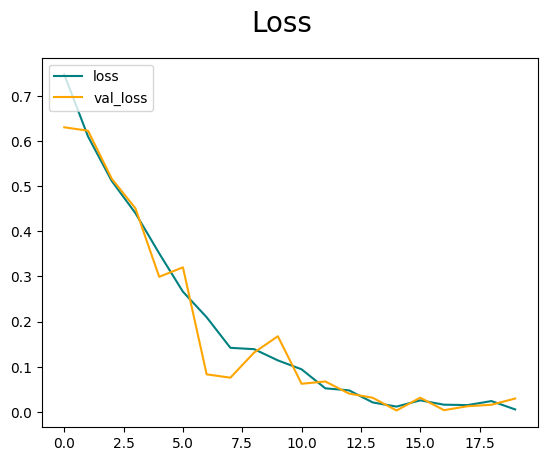

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

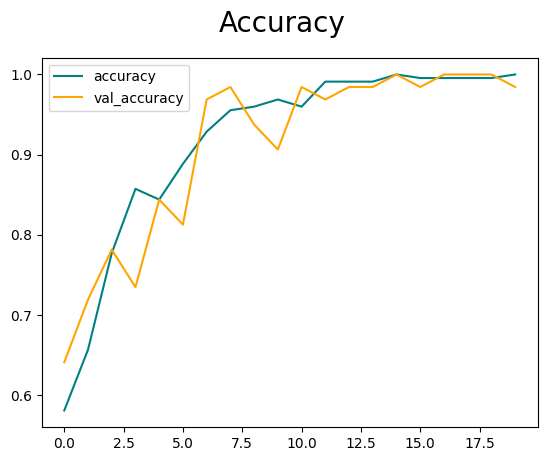

In [83]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [83]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [84]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [85]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


2024-08-10 23:18:12.282744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [86]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [87]:
import cv2

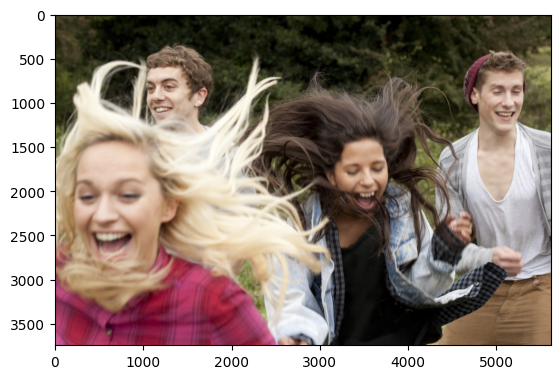

In [109]:
img = cv2.imread('154006829.jpg')
#Since the image is read in BGR so we need to switch it to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

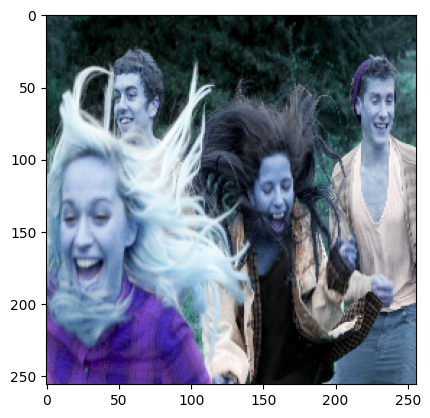

In [110]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [111]:
#Since the model.predict is usually be fed with multiple pictures so at here we need to expand dims
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [115]:
yhat

array([[0.6621448]], dtype=float32)

In [117]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [95]:
from tensorflow.keras.models import load_model

In [96]:
model.save(os.path.join('models','imageclassifier.h5'))

In [97]:
new_model = load_model('imageclassifier.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'imageclassifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))